In [9]:
# imports
import pandas as pd
import numpy as np
from ast import literal_eval

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


In [4]:
# load data
datafile_path = "example_classification//fine_food_reviews_with_embeddings_1k.csv"

df = pd.read_csv(datafile_path)
df["embedding"] = df.embedding.apply(literal_eval).apply(np.array)  # convert string to array

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    list(df.embedding.values), df.Score, test_size=0.2, random_state=42
)

# train random forest classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
probas = clf.predict_proba(X_test)

report = classification_report(y_test, preds)
print(report)

              precision    recall  f1-score   support

           1       1.00      0.40      0.57        20
           2       1.00      0.38      0.55         8
           3       1.00      0.18      0.31        11
           4       1.00      0.26      0.41        27
           5       0.74      1.00      0.85       134

    accuracy                           0.77       200
   macro avg       0.95      0.44      0.54       200
weighted avg       0.83      0.77      0.72       200



RandomForestClassifier() - Average precision score over all classes: 0.88


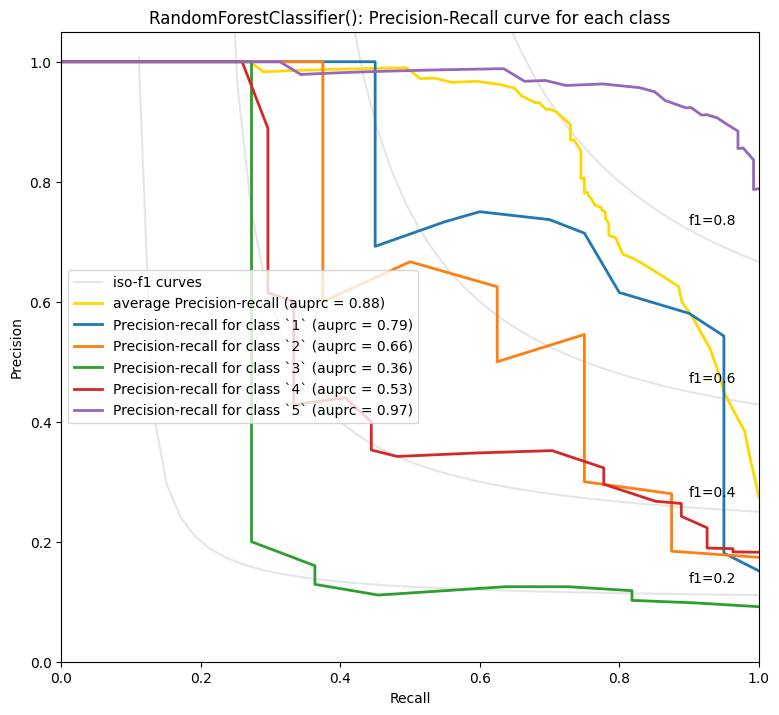

In [6]:
from openai.embeddings_utils import plot_multiclass_precision_recall

plot_multiclass_precision_recall(probas, y_test, [1, 2, 3, 4, 5], clf)